In [1]:

!pip install kaggle


from google.colab import files
files.upload()

# Move the kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 70.3MB/s]
Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [4]:
import pandas as pd
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [11]:
# Display summary statistics for numerical columns
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [13]:
# Look at the unique values in the categorical columns
data['Genre'].unique().tolist()

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Biography, Drama, History',
 'Action, Adventure, Sci-Fi',
 'Drama, Romance',
 'Western',
 'Action, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Comedy, Drama, Thriller',
 'Adventure, Drama, Sci-Fi',
 'Animation, Adventure, Family',
 'Drama, War',
 'Crime, Drama, Fantasy',
 'Comedy, Drama, Romance',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Action, Drama, Mystery',
 'Drama, Family, Fantasy',
 'Drama, Music',
 'Biography, Comedy, Drama',
 'Drama, Mystery, Sci-Fi',
 'Biography, Drama, Music',
 'Crime, Mystery, Thriller',
 'Animation, Adventure, Drama',
 'Animation, Drama, War',
 'Adventure, Comedy, Sci-Fi',
 'Horror, Mystery, Thriller',
 'Drama, Romance, War',
 'Comedy, Drama, Family',
 'Animation, Drama, Fantasy',
 'Action, Biography, Drama',
 'Animation, Action, Adventure',
 'Drama, Western',
 'Action, Adventure',
 'Comedy, Drama',
 'Drama, Family',
 'Drama, Mystery, 

In [15]:
duplicates = data.duplicated().sum()
duplicates

0

In [16]:
# Fill missing values in 'Certificate' with 'Unknown'
data['Certificate'].fillna('Unknown', inplace=True)

# Fill missing 'Meta_score' with the median value
data['Meta_score'].fillna(data['Meta_score'].median(), inplace=True)

# Convert 'Gross' to numeric after removing commas
# Handle missing values in 'Gross' by filling with the median value after conversion
data['Gross'] = pd.to_numeric(data['Gross'].str.replace(',', ''), errors='coerce')
data['Gross'].fillna(data['Gross'].median(), inplace=True)

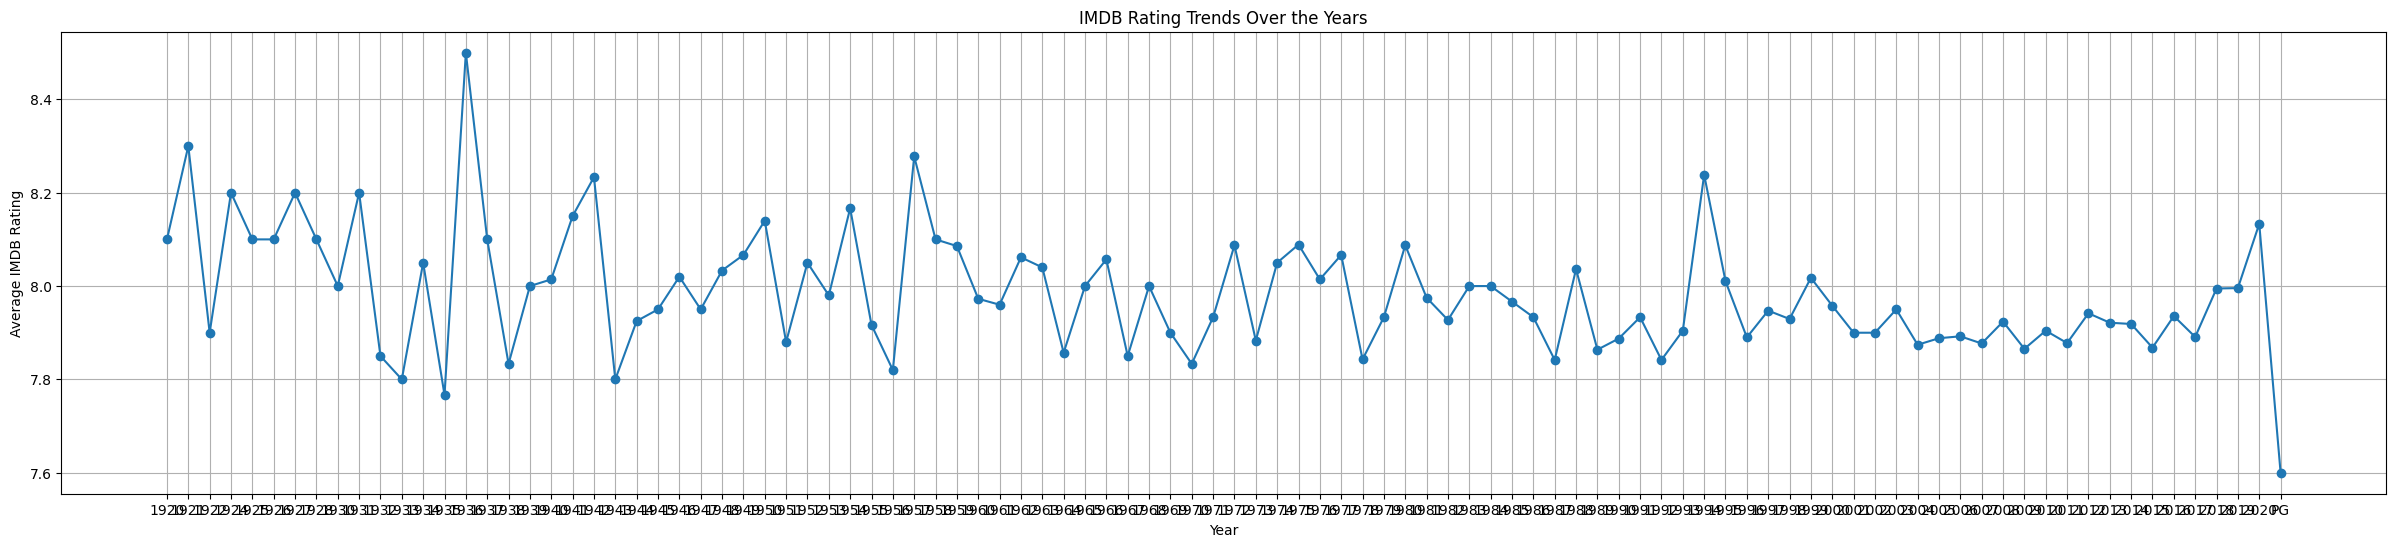

In [22]:
import matplotlib.pyplot as plt

# Group the data by Released_Year and calculate the average IMDB_Rating for each year
rating_trends = data.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Create a line plot for the average IMDB ratings over the years
plt.figure(figsize=(30, 6))
plt.plot(rating_trends['Released_Year'], rating_trends['IMDB_Rating'], marker='o', linestyle='-')
plt.title('IMDB Rating Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()

#I guess we should remove the last year

<ipython-input-21-1738f7970cf6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')


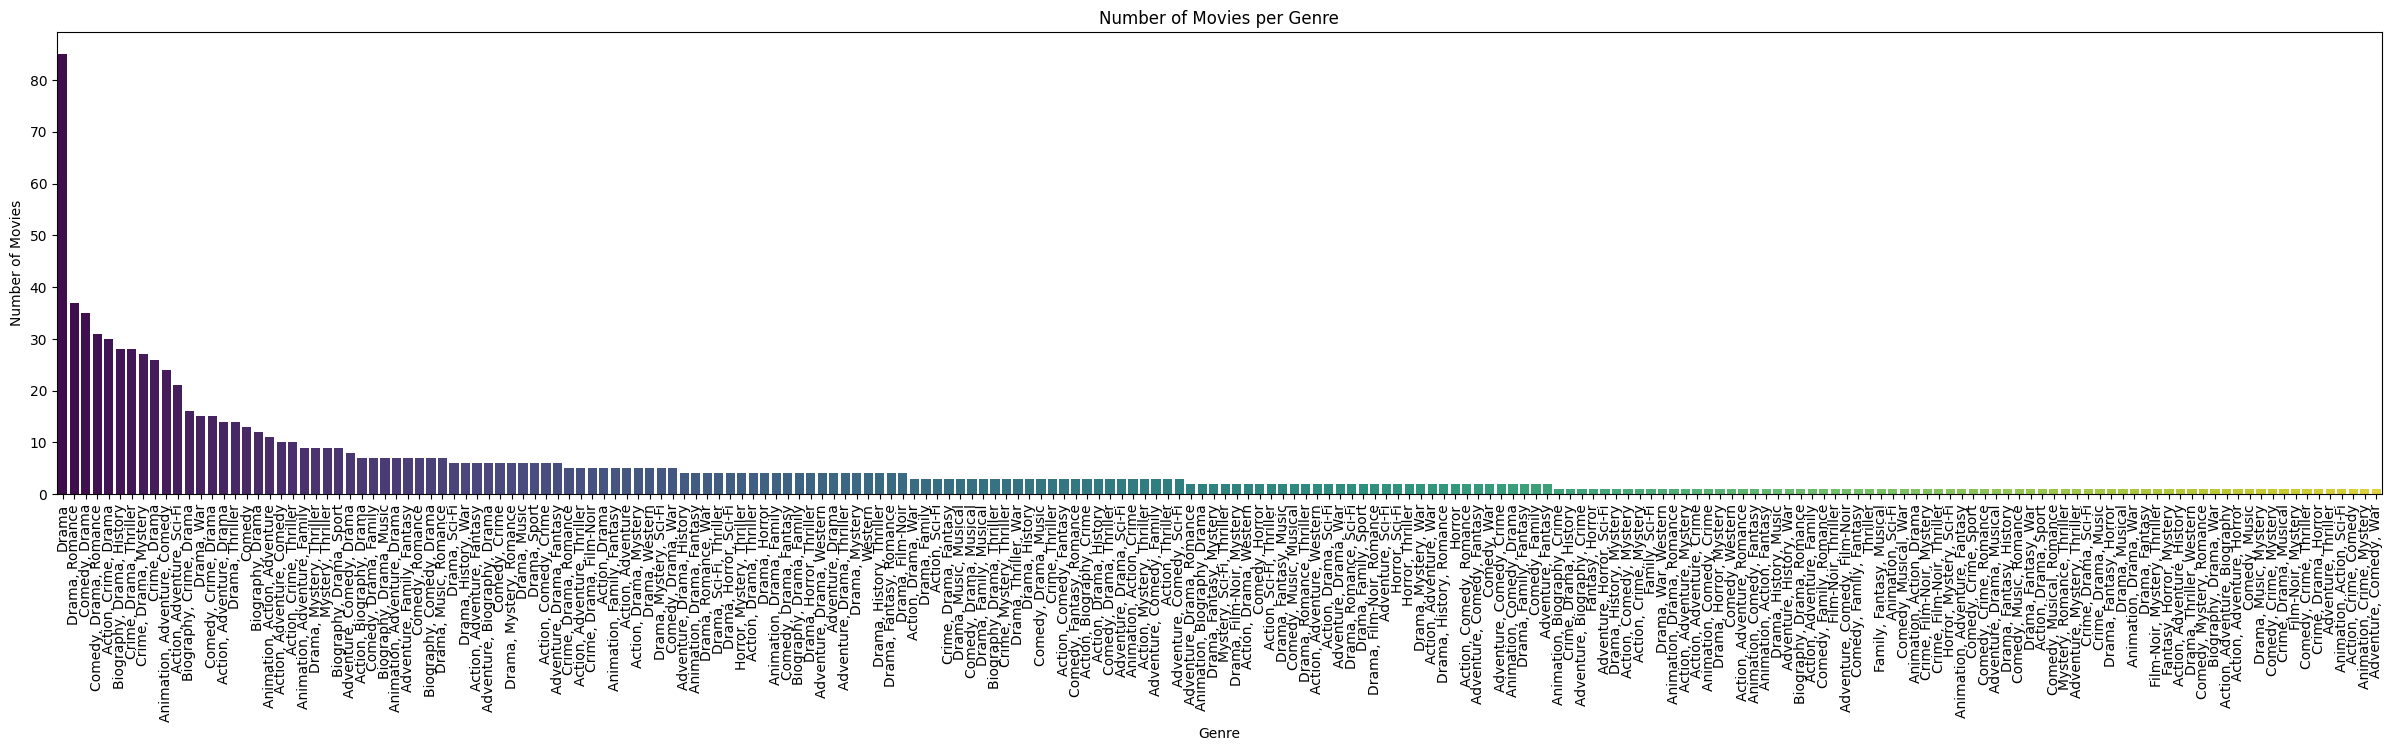

In [21]:
import seaborn as sns
# Count the number of movies per genre
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create a bar plot for genre popularity
plt.figure(figsize=(30, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [23]:
# Display the top 9 most common genres
top_genres = data['Genre'].value_counts().head(9)
print(top_genres)

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
Biography, Drama, History    28
Crime, Drama, Thriller       28
Crime, Drama, Mystery        27
Crime, Drama                 26
Name: count, dtype: int64


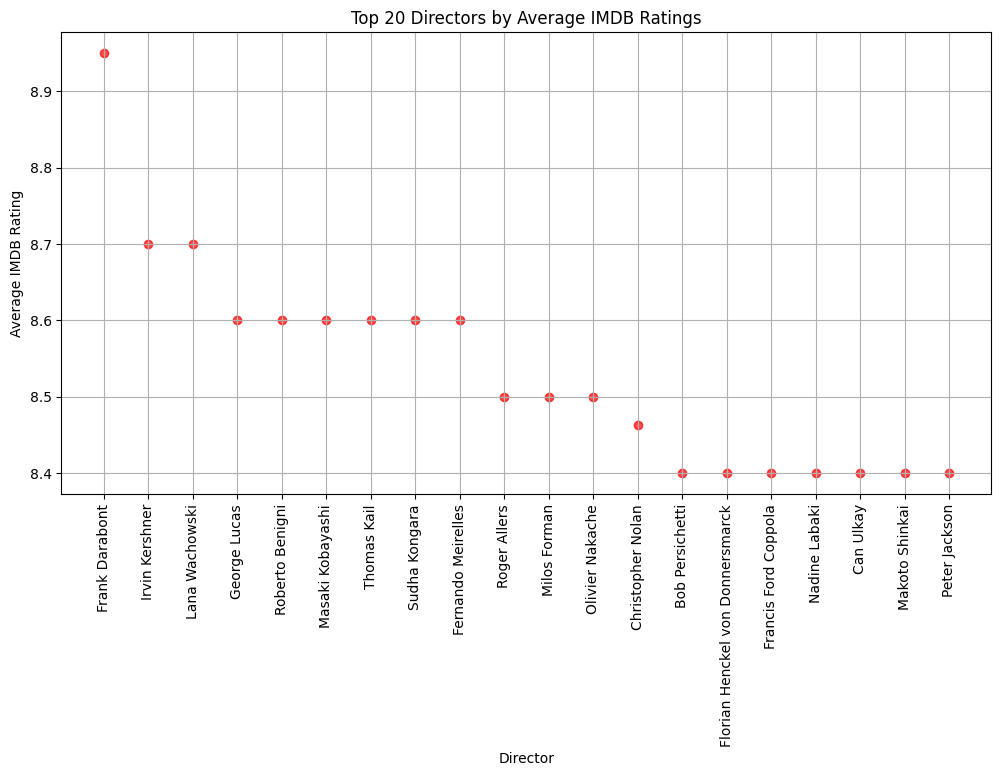

In [24]:
# Group the data by Director and calculate the average IMDB_Rating for each director
director_ratings = data.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Sort the directors by their average IMDB rating in descending order
director_ratings = director_ratings.sort_values(by='IMDB_Rating', ascending=False).head(20)

# Create a scatter plot to visualize directors vs. their average IMDB ratings
plt.figure(figsize=(12, 6))
plt.scatter(director_ratings['Director'], director_ratings['IMDB_Rating'], color='red', alpha=0.7)
plt.xticks(rotation=90)
plt.title('Top 20 Directors by Average IMDB Ratings')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()


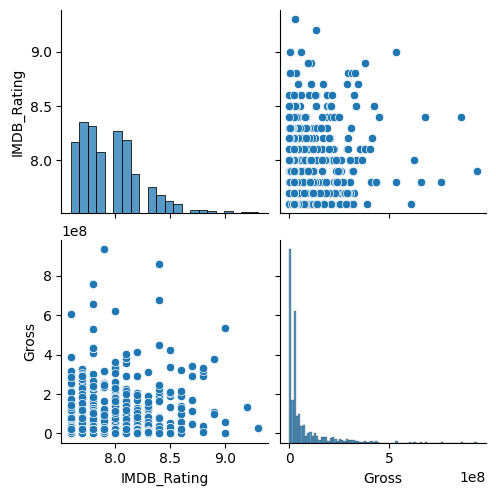

In [25]:

# Selecting relevant columns for pairplot
star_columns = ['IMDB_Rating', 'Gross', 'Star1']

# Create a pairplot to visualize relationships
sns.pairplot(data[star_columns])
plt.show()


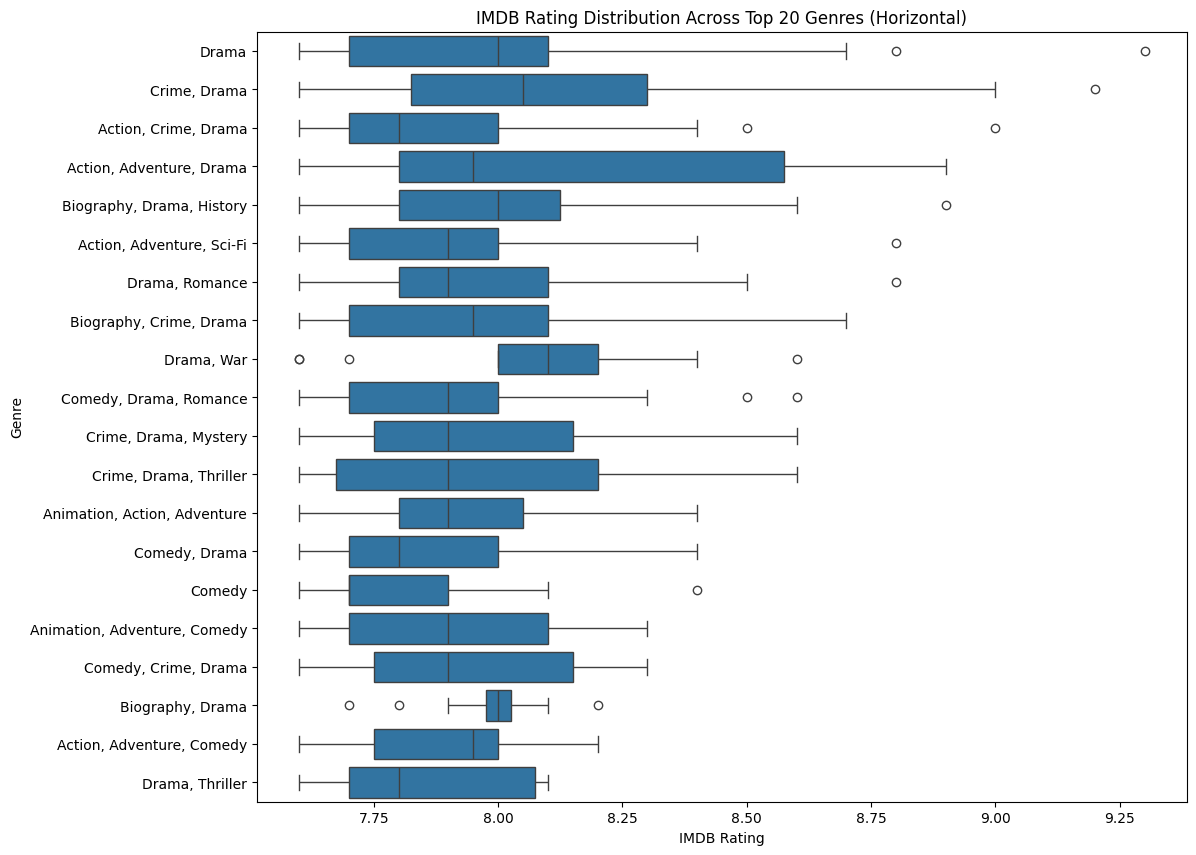

In [29]:
# Limit to the top 20 most frequent genres
top_20_genres = data['Genre'].value_counts().index[:20]

# Filter the dataset to only include movies in the top 20 genres
filtered_data = data[data['Genre'].isin(top_20_genres)]

# Create a horizontal box plot for the top 20 genres
plt.figure(figsize=(12, 10))  # Adjust height to fit all genres
sns.boxplot(y='Genre', x='IMDB_Rating', data=filtered_data)
plt.title('IMDB Rating Distribution Across Top 20 Genres (Horizontal)')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.show()

In [31]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

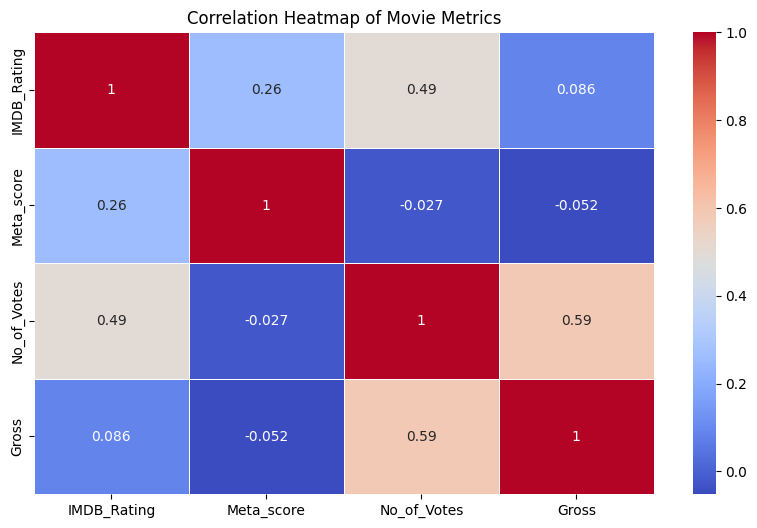

In [32]:
# Select numerical columns for correlation analysis
numeric_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Movie Metrics')
plt.show()